In [1]:
%matplotlib inline
import os  
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (15,10)
plt.ioff()
plt.interactive(False)
block_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

## Select data-frames by interval size

In [2]:
interval='interval_6'
wdir = f'../res/backup_strategy_cmp/{interval}/'

## Load data and compute averages for each benchmark

In [3]:
cmp = pd.DataFrame()

for fn in sorted(os.listdir(wdir)):
    tname = fn[:-4]
    df = pd.read_csv(wdir + fn, index_col=interval )
    cmp[tname] = df.mean()
    cmp.loc['interval_cnt', tname] = df.block_1.count()

In [4]:
cmp = cmp.T[cmp.T.interval_cnt > 1].T
cmp.T

modified  oracle_alive  oracle_modified  \
cjpeg                2976.875000   2777.500000      1068.500000   
dijkstra             1443.552632   8761.631579       799.368421   
fft                   199.126984    195.888889        72.095238   
matmul16_float        295.314286    186.228571        89.542857   
matmul16_int          289.500000     78.500000        74.000000   
matmul32_int          469.000000    442.400000       223.400000   
qsort               29392.625000  20430.843750     19877.281250   
str_search            672.750000   1152.833333       244.583333   
susan_edge_large     1642.326241   2380.425532      1171.886525   
susan_edge_small     2163.166667   1894.833333      1618.666667   
susan_smooth_small    205.485714    511.885714       137.371429   

                    hibernus_word  hibernus_page_512  hibernus_page_1K  \
cjpeg                      8037.0            10624.0           12032.0   
dijkstra                  13095.0            14848.0           15616.0   
fft                        1636.0             3200.0            3584.0   
matmul16_float             1340.0             2944.0            3328.0   
matmul16_int               1014.0             2560.0            3328.0   
matmul32_int               3350.0             4864.0            5376.0   
qsort                    320766.0           322688.0          323584.0   
str_search                 7734.0             8960.0            9472.0   
susan_edge_large         166944.0           168704.0          169728.0   
susan_edge_small          11886.0            13696.0           14592.0   
susan_smooth_small         5312.0             7040.0            7936.0   

                    hibernus_page_2K       block_1       block_2  \
cjpeg                        13824.0   5058.375000   5254.500000   
dijkstra                     16384.0   9805.394737   9943.078947   
fft                           4608.0    337.365079    369.396825   
matmul16_float                4096.0    418.971429    467.600000   
matmul16_int                  4608.0    633.000000    676.000000   
matmul32_int                  6144.0   1314.800000   1344.400000   
qsort                       324608.0  30494.406250  31306.500000   
str_search                    9728.0   2111.750000   2144.333333   
susan_edge_large            171008.0   3996.624113   4256.851064   
susan_edge_small             15872.0   4090.166667   4202.000000   
susan_smooth_small            9216.0    725.028571    733.542857   

                         block_4      ...        block_2_mod   block_4_mod  \
cjpeg                5451.000000      ...        3009.500000   3051.500000   
dijkstra             9993.473684      ...        1537.368421   1708.421053   
fft                   414.158730      ...         218.190476    241.968254   
matmul16_float        530.742857      ...         328.057143    367.314286   
matmul16_int          738.000000      ...         311.000000    344.000000   
matmul32_int         1392.000000      ...         484.800000    508.800000   
qsort               33453.250000      ...       29551.875000  30133.000000   
str_search           2199.333333      ...         688.166667    716.333333   
susan_edge_large     4590.780142      ...        1766.794326   1927.404255   
susan_edge_small     4462.666667      ...        2238.666667   2377.333333   
susan_smooth_small    747.085714      ...         208.457143    213.714286   

                     block_8_mod  block_16_mod  block_32_mod  block_64_mod  \
cjpeg                3165.000000   3282.000000   3508.000000   3936.000000   
dijkstra             1897.473684   1964.210526   2093.473684   2236.631579   
fft                   286.349206    355.555556    488.126984    641.015873   
matmul16_float        433.371429    522.971429    658.285714    749.714286   
matmul16_int          400.000000    488.000000    624.000000    800.000000   
matmul32_int          550.400000    601.600000    691.200000    819.200000   
qsort               31384.7500

### Renaming with abbreviations

In [5]:
abbreviations = ['sss', 'ses', 'crc', 'mm16f', 'fft', 'cjpeg', 'sl', 'qsort', 'mm16i', 'dijk', 'mm32i', 'sel', 'avg']
name_map = {'cjpeg': 'cjpeg',
 'dijkstra': 'dijk',
 'fft': 'fft',
 'matmul_float_16': 'mm16f',
 'matmul_int_16': 'mm16i',
 'matmul_int_32': 'mm32i',
 'matmul16_int': 'mm16i',
 'matmul32_int': 'mm32i',
 'matmul16_float': 'mm16f',
 'qsort_small': 'qsort',
 'qsort': 'qsort',
 'search_large': 'sl',
 'str_search': 'sl',
 'susan_edge_large': 'sel',
 'susan_edge_small': 'ses',
 'susan_smooth_small': 'sss'}

In [6]:
cmp = cmp.T
cmp['trace'] = cmp.index.map(name_map)
cmp = cmp.reset_index(drop=True).set_index('trace')
cmp = cmp.T
cmp.T

modified  oracle_alive  oracle_modified  hibernus_word  \
trace                                                               
cjpeg   2976.875000   2777.500000      1068.500000         8037.0   
dijk    1443.552632   8761.631579       799.368421        13095.0   
fft      199.126984    195.888889        72.095238         1636.0   
mm16f    295.314286    186.228571        89.542857         1340.0   
mm16i    289.500000     78.500000        74.000000         1014.0   
mm32i    469.000000    442.400000       223.400000         3350.0   
qsort  29392.625000  20430.843750     19877.281250       320766.0   
sl       672.750000   1152.833333       244.583333         7734.0   
sel     1642.326241   2380.425532      1171.886525       166944.0   
ses     2163.166667   1894.833333      1618.666667        11886.0   
sss      205.485714    511.885714       137.371429         5312.0   

       hibernus_page_512  hibernus_page_1K  hibernus_page_2K       block_1  \
trace                                                                        
cjpeg            10624.0           12032.0           13824.0   5058.375000   
dijk             14848.0           15616.0           16384.0   9805.394737   
fft               3200.0            3584.0            4608.0    337.365079   
mm16f             2944.0            3328.0            4096.0    418.971429   
mm16i             2560.0            3328.0            4608.0    633.000000   
mm32i             4864.0            5376.0            6144.0   1314.800000   
qsort           322688.0          323584.0          324608.0  30494.406250   
sl                8960.0            9472.0            9728.0   2111.750000   
sel             168704.0          169728.0          171008.0   3996.624113   
ses              13696.0           14592.0           15872.0   4090.166667   
sss               7040.0            7936.0            9216.0    725.028571   

            block_2       block_4      ...        block_2_mod   block_4_mod  \
trace                                  ...                                    
cjpeg   5254.500000   5451.000000      ...        3009.500000   3051.500000   
dijk    9943.078947   9993.473684      ...        1537.368421   1708.421053   
fft      369.396825    414.158730      ...         218.190476    241.968254   
mm16f    467.600000    530.742857      ...         328.057143    367.314286   
mm16i    676.000000    738.000000      ...         311.000000    344.000000   
mm32i   1344.400000   1392.000000      ...         484.800000    508.800000   
qsort  31306.500000  33453.250000      ...       29551.875000  30133.000000   
sl      2144.333333   2199.333333      ...         688.166667    716.333333   
sel     4256.851064   4590.780142      ...        1766.794326   1927.404255   
ses     4202.000000   4462.666667      ...        2238.666667   2377.333333   
sss      733.542857    747.085714      ...         208.457143    213.714286   

        block_8_mod  block_16_mod  block_32_mod  block_64_mod  block_128_mod  \
trace                                                                          
cjpeg   3165.000000   3282.000000   3508.000000   3936.000000    4528.000000   
dijk    1897.473684   1964.210526   2093.473684   2236.631579    2516.210526   
fft      286.349206    355.555556    488.126984    641.015873     839.111111   
mm16f    433.371429    522.971429    658.285714    749.714286    1042.285714   
mm16i    400.000000    488.000000    624.000000    800.000000    1152.000000   
mm32i    550.400000    601.600000    691.200000    819.200000    1049.600000   
qsort  31384.750000  37613.500000  46321.000000  50032.000000   53212.000000   
sl       751.333333    789.333333    864.000000   1040.000000    1365.333333   
sel     2139.120567   2396.595745   2617.191489   2823.262411    2967.602837   
ses     2638.666667   2922.666667   3333.333333   3626.666667    3946.666667   
sss      223.314286    240.000000    270.628571    332.800000     420.571429   

       block_256_mod  block_5

In [7]:
hibernus_next_pwr_two = 2**np.ceil(np.log2(cmp.T.hibernus_word)) #

In [8]:
cmp.divide(hibernus_next_pwr_two).T

modified  oracle_alive  oracle_modified  hibernus_word  \
trace                                                           
cjpeg  0.363388      0.339050         0.130432       0.981079   
dijk   0.088107      0.534768         0.048790       0.799255   
fft    0.097230      0.095649         0.035203       0.798828   
mm16f  0.144196      0.090932         0.043722       0.654297   
mm16i  0.282715      0.076660         0.072266       0.990234   
mm32i  0.114502      0.108008         0.054541       0.817871   
qsort  0.056062      0.038969         0.037913       0.611813   
sl     0.082123      0.140727         0.029856       0.944092   
sel    0.006265      0.009081         0.004470       0.636841   
ses    0.132029      0.115651         0.098796       0.725464   
sss    0.025084      0.062486         0.016769       0.648438   

       hibernus_page_512  hibernus_page_1K  hibernus_page_2K   block_1  \
trace                                                                    
cjpeg           1.296875          1.468750          1.687500  0.617477   
dijk            0.906250          0.953125          1.000000  0.598474   
fft             1.562500          1.750000          2.250000  0.164729   
mm16f           1.437500          1.625000          2.000000  0.204576   
mm16i           2.500000          3.250000          4.500000  0.618164   
mm32i           1.187500          1.312500          1.500000  0.320996   
qsort           0.615479          0.617188          0.619141  0.058163   
sl              1.093750          1.156250          1.187500  0.257782   
sel             0.643555          0.647461          0.652344  0.015246   
ses             0.835938          0.890625          0.968750  0.249644   
sss             0.859375          0.968750          1.125000  0.088504   

        block_2   block_4      ...       block_2_mod  block_4_mod  \
trace                          ...                                  
cjpeg  0.641418  0.665405      ...          0.367371     0.372498   
dijk   0.606877  0.609953      ...          0.093834     0.104274   
fft    0.180370  0.202226      ...          0.106538     0.118149   
mm16f  0.228320  0.259152      ...          0.160184     0.179353   
mm16i  0.660156  0.720703      ...          0.303711     0.335938   
mm32i  0.328223  0.339844      ...          0.118359     0.124219   
qsort  0.059712  0.063807      ...          0.056366     0.057474   
sl     0.261759  0.268473      ...          0.084005     0.087443   
sel    0.016239  0.017512      ...          0.006740     0.007352   
ses    0.256470  0.272380      ...          0.136637     0.145101   
sss    0.089544  0.091197      ...          0.025446     0.026088   

       block_8_mod  block_16_mod  block_32_mod  block_64_mod  block_128_mod  \
trace                                                                         
cjpeg     0.386353      0.400635      0.428223      0.480469       0.552734   
dijk      0.115813      0.119886      0.127775      0.136513       0.153577   
fft       0.139819      0.173611      0.238343      0.312996       0.409722   
mm16f     0.211607      0.255357      0.321429      0.366071       0.508929   
mm16i     0.390625      0.476562      0.609375      0.781250       1.125000   
mm32i     0.134375      0.146875      0.168750      0.200000       0.256250   
qsort     0.059862      0.071742      0.088350      0.095428       0.101494   
sl        0.091715      0.096354      0.105469      0.126953       0.166667   
sel       0.008160      0.009142      0.009984      0.010770       0.011321   
ses       0.161051      0.178385      0.203451      0.221354       0.240885   
sss       0.027260      0.029297      0.033036      0.040625       0.051339   

       block_256_mod  block_512_mod  interval_cnt  
trace                                              
cjpeg       0.671875       0.781250      0.000977  
dijk        0.202714       0.247122      0.004639  
fft         0.559524       0.908730      0.030762  
mm16f       

## Strategy comparisons vs Full Memory (closest power of 2)

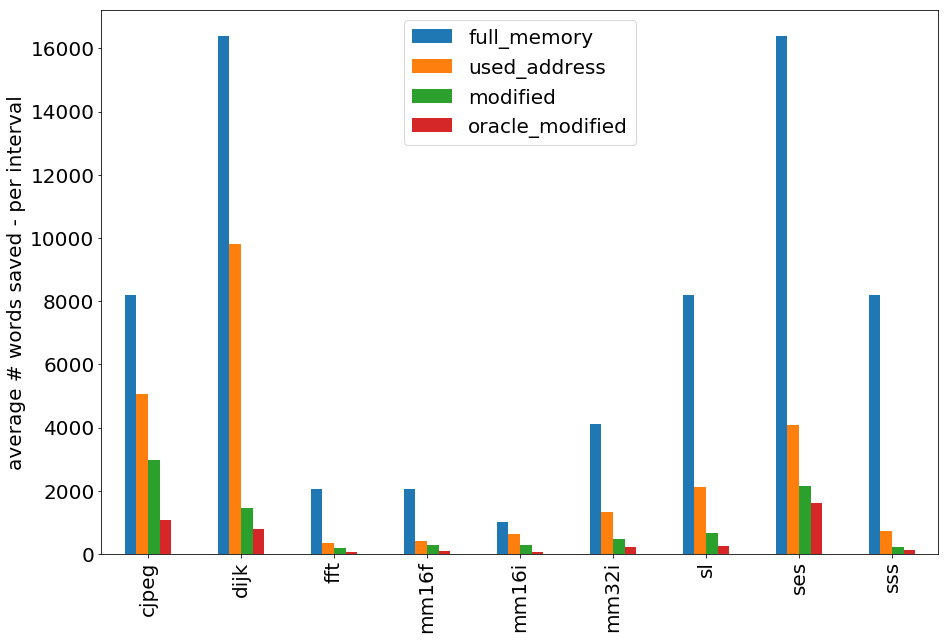

In [9]:
d = cmp.T[['modified',  'oracle_modified']]
d['full_memory'] = hibernus_next_pwr_two
d['used_address'] = cmp.T.block_1
ax = d[d.full_memory < 2**16][['full_memory', 'used_address', 'modified', 'oracle_modified']].plot.bar(figsize=(15,10), fontsize=20)
ax.set_ylabel('average # words saved - per interval', fontsize=20)
ax.set_xlabel('')
ax.legend(prop={'size':20})

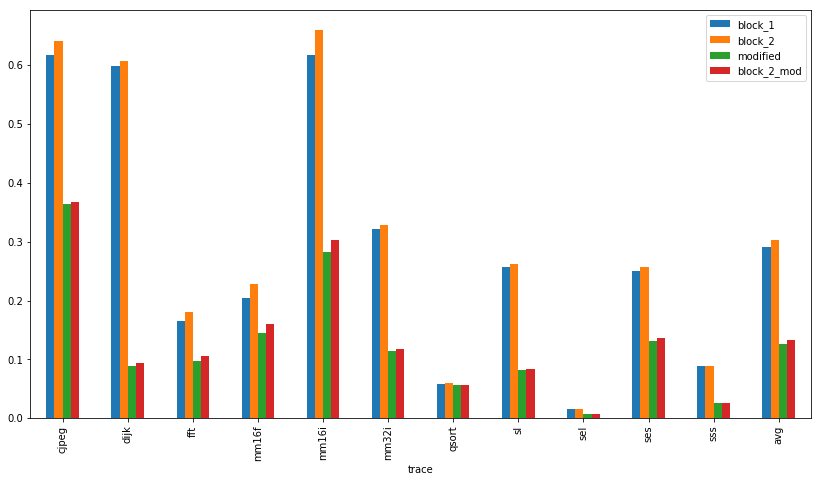

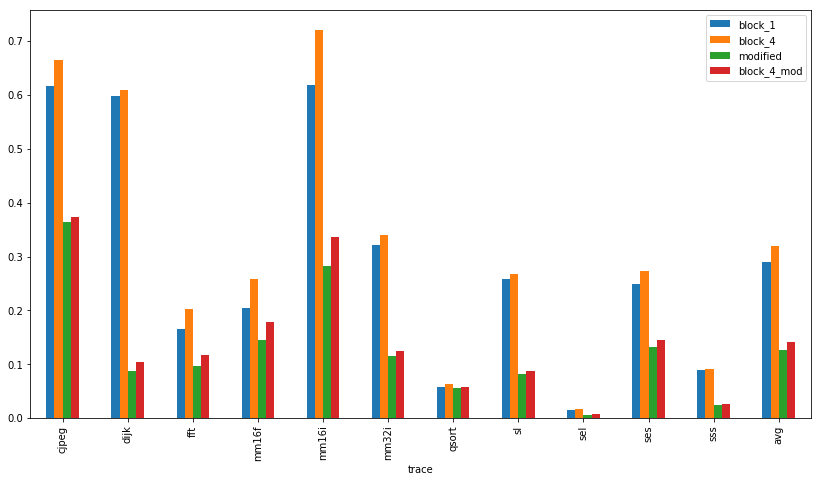

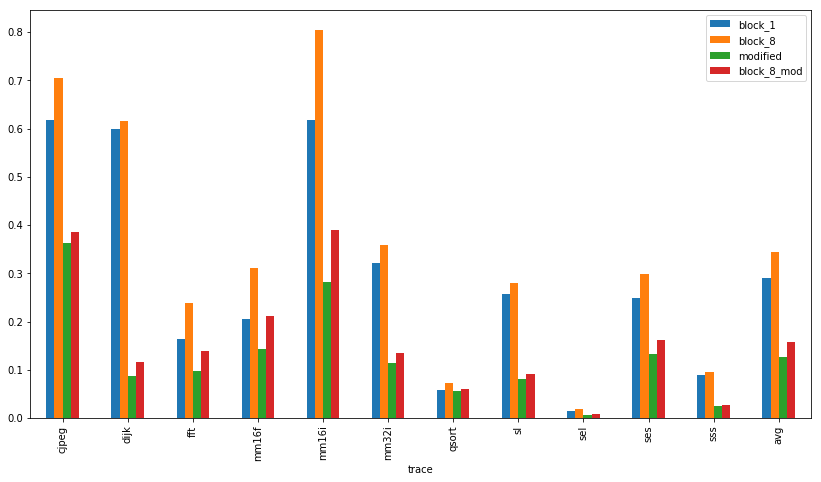

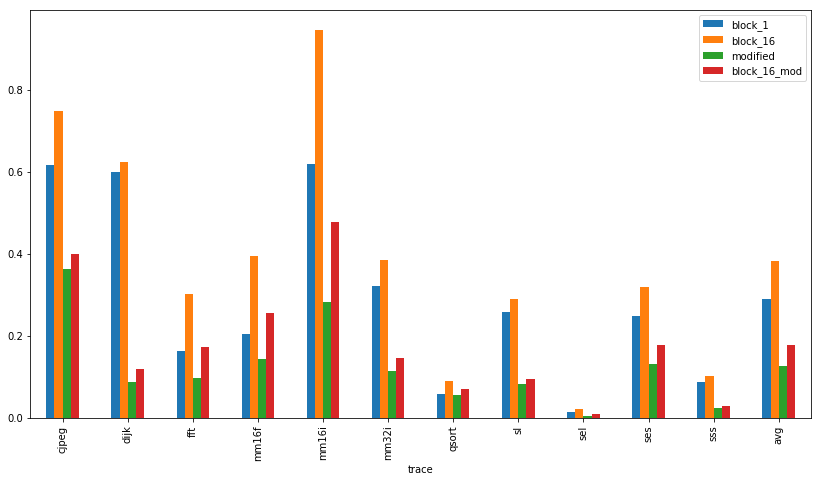

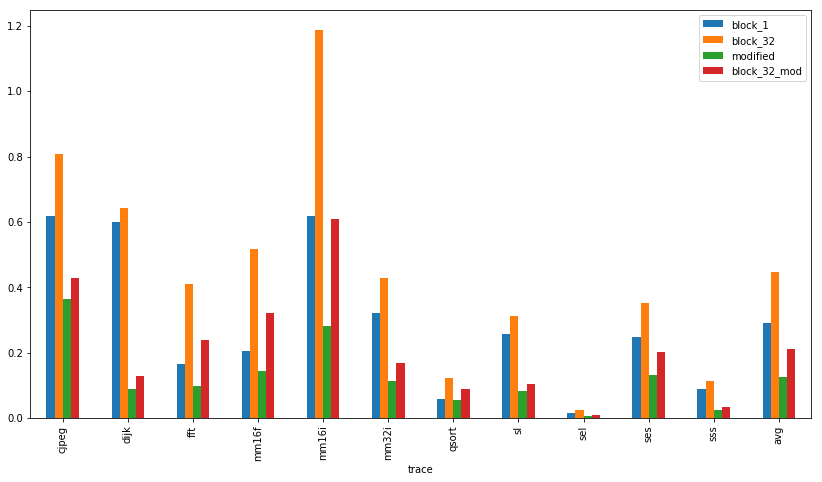

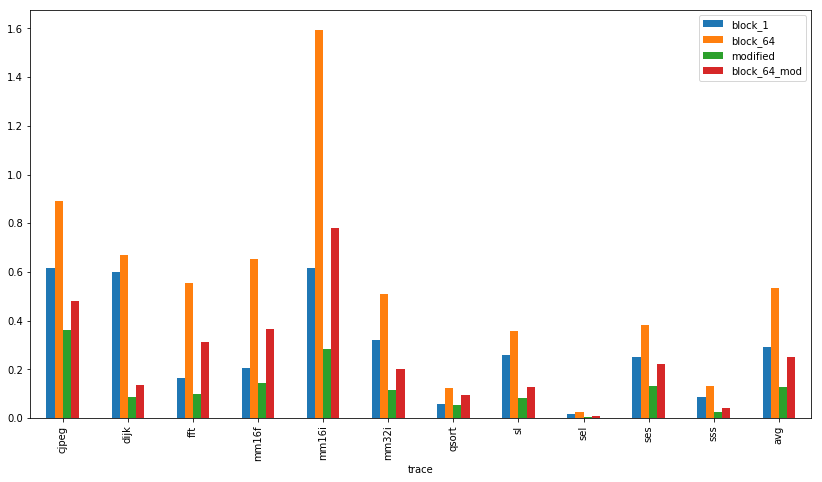

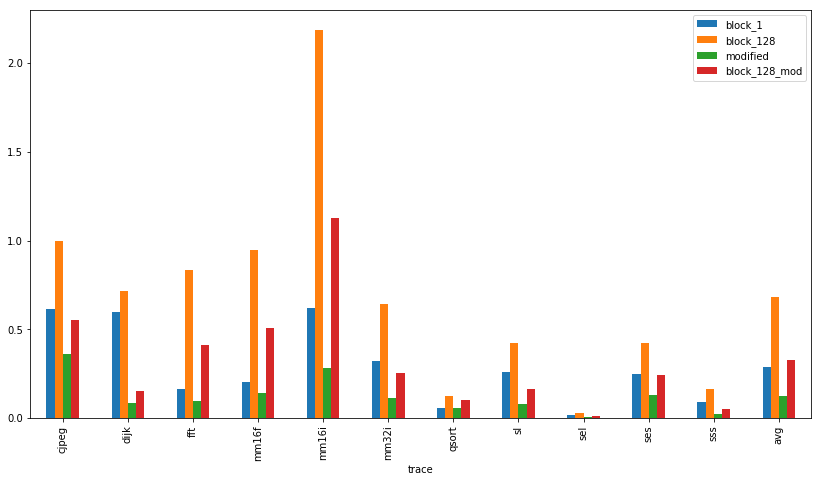

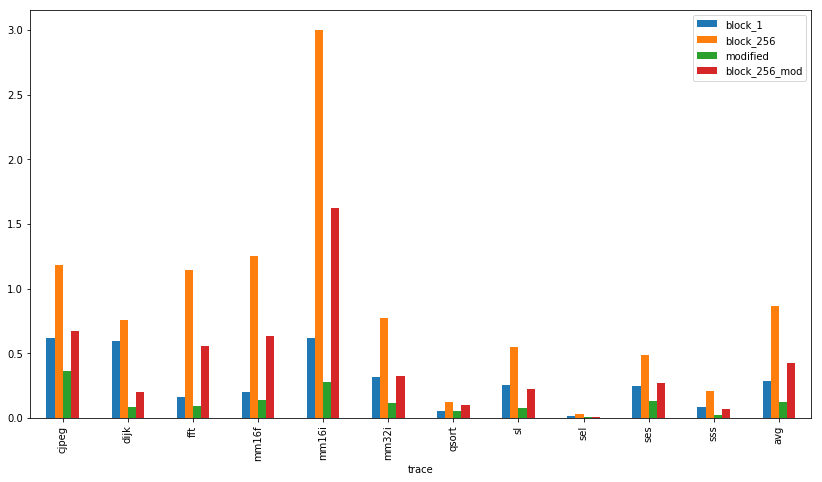

In [10]:
tmp = cmp.divide(hibernus_next_pwr_two).T
tmp.loc['avg'] = tmp.mean()
for i in [2, 4, 8, 16, 32, 64, 128, 256]:
    cols = ['block_1', f'block_{i}', 'modified',  f'block_{i}_mod',]
    tmp[cols].plot(kind='bar', figsize=(14,7.5))
    print()
    fig = plt.show()
    print()
    plt.close()

## Average backup size normalised vs Mem size (next power of 2)

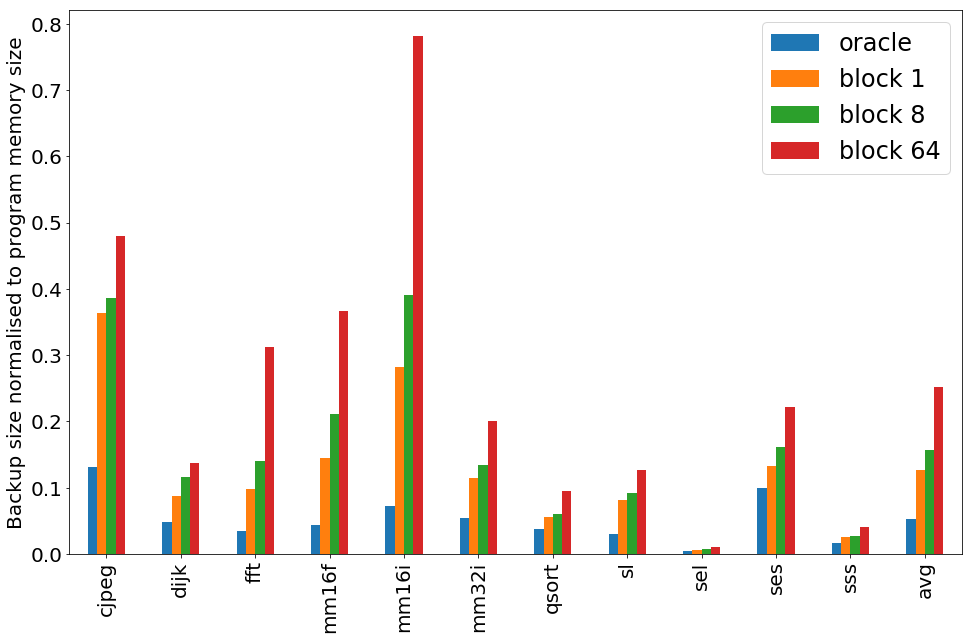

In [11]:
ax = (tmp[['oracle_modified', 'block_1_mod', 'block_8_mod', 'block_64_mod']]).plot(kind='bar', figsize=(16,10), fontsize=20)#rot=0,
ax.set_ylabel('Backup size normalised to program memory size', fontsize=20)
ax.legend(['oracle', 'block 1', 'block 8', 'block 64'], prop={'size':24})
ax.set_xlabel('')
plt.show()

In [12]:
1-tmp.loc['avg','block_8_mod']

0.8430327307056856

## Number of intervals per benchmark

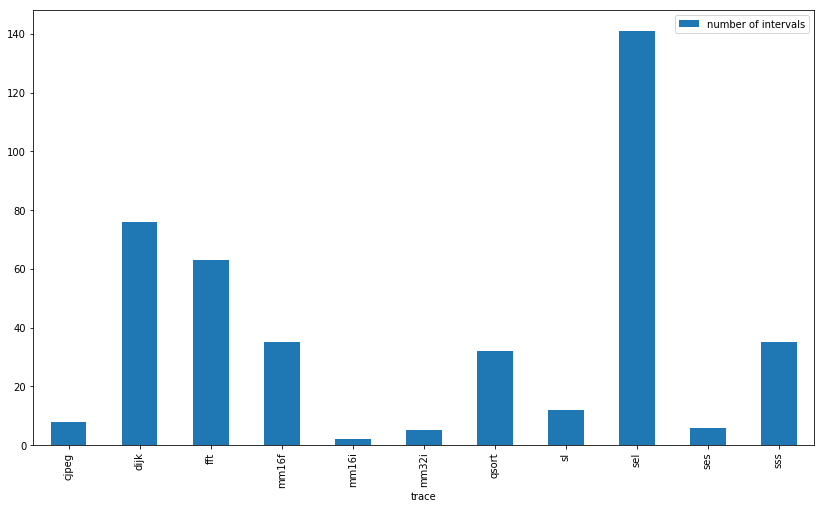

In [13]:
cmp.T['interval_cnt'].to_frame('number of intervals').plot(kind='bar', figsize=(14,8))
plt.show()
plt.close()
print()

## Backup size vs Block size

In [14]:
cmp.divide(cmp.T['block_1_mod']).T[[f'block_{bs}_mod' for bs in [1, 2, 4, 8, 16, 32, 64]]]

block_1_mod  block_2_mod  block_4_mod  block_8_mod  block_16_mod  \
trace                                                                     
cjpeg          1.0     1.010959     1.025068     1.063195      1.102498   
dijk           1.0     1.064990     1.183484     1.314447      1.360678   
fft            1.0     1.095735     1.215145     1.438023      1.785572   
mm16f          1.0     1.110875     1.243808     1.467492      1.770898   
mm16i          1.0     1.074266     1.188256     1.381693      1.685665   
mm32i          1.0     1.033689     1.084861     1.173561      1.282729   
qsort          1.0     1.005418     1.025189     1.067776      1.279692   
sl             1.0     1.022916     1.064784     1.116809      1.173294   
sel            1.0     1.075788     1.173582     1.302494      1.459269   
ses            1.0     1.034903     1.099006     1.219817      1.351106   
sss            1.0     1.014461     1.040044     1.086763      1.167964   

       block_32_mod  block_64_mod  
trace                              
cjpeg      1.178417      1.322192  
dijk       1.450223      1.549394  
fft        2.451335      3.219131  
mm16f      2.229102      2.538700  
mm16i      2.155440      2.763385  
mm32i      1.473774      1.746695  
qsort      1.575940      1.702196  
sl         1.284281      1.545894  
sel        1.593588      1.719063  
ses        1.540951      1.676554  
sss        1.317019      1.619577

In [15]:
block_mod_norm1 = cmp.divide(cmp.T['block_1_mod']).T[[f'block_{bs}_mod' for bs in [1, 2, 4, 8, 16, 32, 64]]]
block_mod_norm1.loc['avg'] = block_mod_norm1.mean()

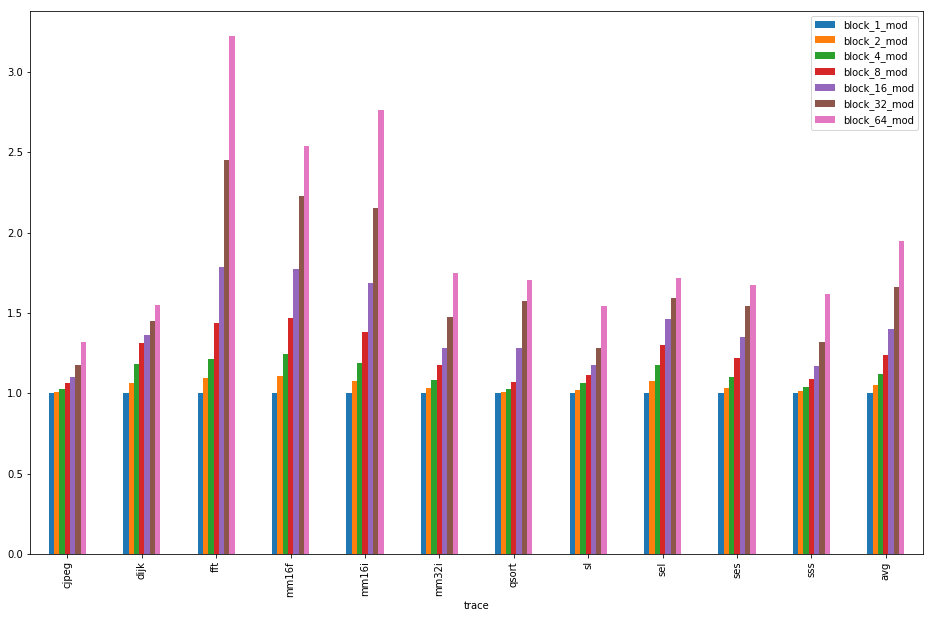

In [16]:
block_mod_norm1.plot(kind='bar', figsize=(16,10))
plt.show()

## Average Increase in backup size

In [17]:
block_mod_norm1.loc['avg']

block_1_mod     1.000000
block_2_mod     1.049454
block_4_mod     1.122112
block_8_mod     1.239279
block_16_mod    1.401760
block_32_mod    1.659097
block_64_mod    1.945707
Name: avg, dtype: float64

## Extra bits needed to track dirty blocks

In [18]:
RAM_SIZES = [1, 2, 4, 8, 16, 32] # kB
for rs in RAM_SIZES:
    wn = rs*1024/4
    print()
    for bs in block_sizes:
        print(f'Number of block_{bs} for {rs}KB SRAM: {int(wn/bs)}')


Number of block_1 for 1KB SRAM: 256
Number of block_2 for 1KB SRAM: 128
Number of block_4 for 1KB SRAM: 64
Number of block_8 for 1KB SRAM: 32
Number of block_16 for 1KB SRAM: 16
Number of block_32 for 1KB SRAM: 8
Number of block_64 for 1KB SRAM: 4
Number of block_128 for 1KB SRAM: 2
Number of block_256 for 1KB SRAM: 1
Number of block_512 for 1KB SRAM: 0

Number of block_1 for 2KB SRAM: 512
Number of block_2 for 2KB SRAM: 256
Number of block_4 for 2KB SRAM: 128
Number of block_8 for 2KB SRAM: 64
Number of block_16 for 2KB SRAM: 32
Number of block_32 for 2KB SRAM: 16
Number of block_64 for 2KB SRAM: 8
Number of block_128 for 2KB SRAM: 4
Number of block_256 for 2KB SRAM: 2
Number of block_512 for 2KB SRAM: 1

Number of block_1 for 4KB SRAM: 1024
Number of block_2 for 4KB SRAM: 512
Number of block_4 for 4KB SRAM: 256
Number of block_8 for 4KB SRAM: 128
Number of block_16 for 4KB SRAM: 64
Number of block_32 for 4KB SRAM: 32
Number of block_64 for 4KB SRAM: 16
Number of block_128 for 4KB SR

##  Energy and Time

In [19]:
def exec_time(t_prog, n_interruptions, t_save, t_restore, t_sleep_avg):
    return t_prog + n_interruptions * (t_save + t_restore + t_sleep_avg)

def energy_per_pwr_interval(p_save, t_save, n_bits, p_on, t_on, p_off, t_off):
    return (p_save * t_save) * n_bit + (p_on * t_on) + (p_off * t_off)

## Backup energy Normalised w.r.t. hibernus

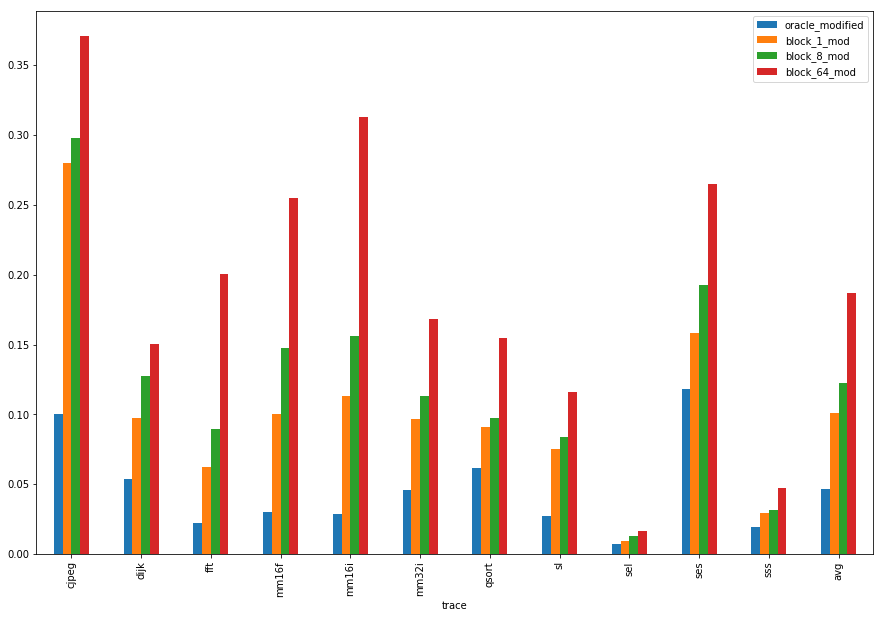

In [20]:
E_byte_fram = 4.2e-9 # J/byte
e_save = cmp.iloc[:-1] * 4 * E_byte_fram *1e6
es = (e_save/ e_save.T.hibernus_page_512).T[['oracle_modified', 'block_1_mod', 'block_8_mod', 'block_64_mod']]
es.loc['avg'] = es.mean()
es.plot(kind='bar', figsize=(15,10))
plt.show()

In [21]:
1-es.loc['avg', 'block_8_mod']

0.8772749740454798

## Bakcup energy vs Liu ISSCC 2016 (A 65 nm ReRAM...)

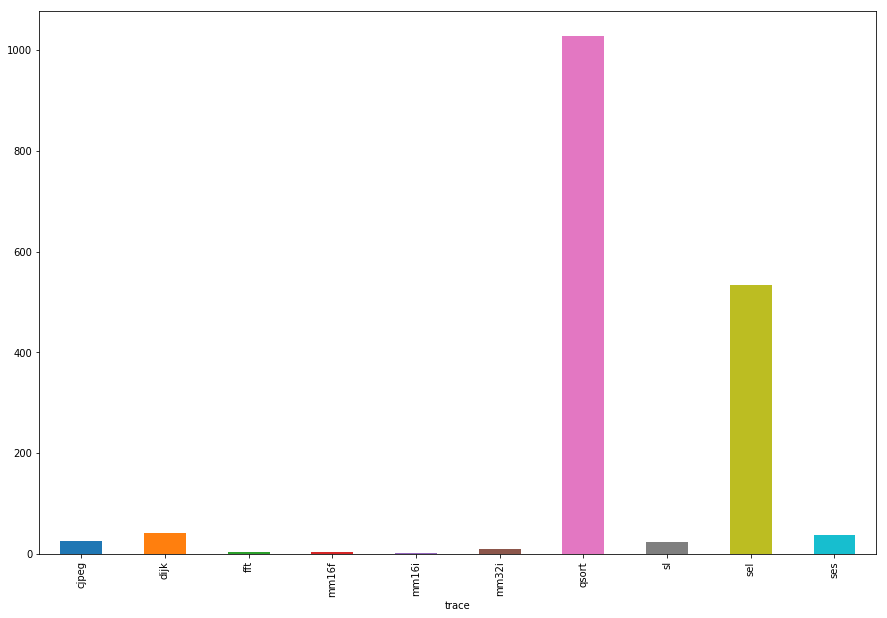

In [22]:
liu_sram = 16*256
liu_store_energy = (3397e-9 - 120e-9)/liu_sram # J/byte
liu_mem_size = ((cmp.T.hibernus_word.iloc[:-1])).T
liu_backup_energy = liu_mem_size * 4 * liu_store_energy
(liu_backup_energy.loc[liu_backup_energy.index != 'qsort_small' ] * 1e6).plot(kind='bar', figsize=(15,10))

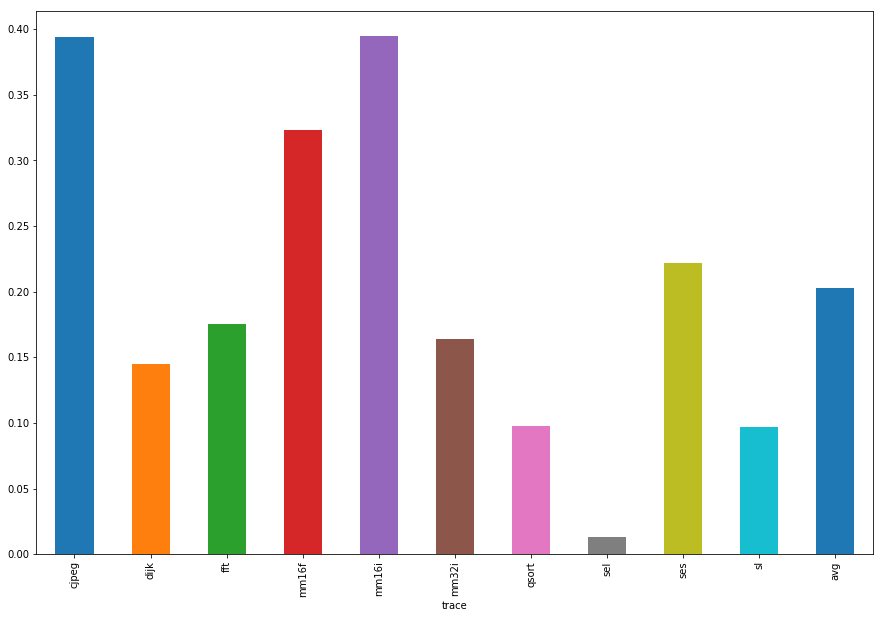

In [23]:
blk_norm_liu = (cmp.T.block_8_mod * 4 * liu_store_energy).divide(liu_backup_energy)
blk_norm_liu.loc['avg'] = blk_norm_liu.mean()
blk_norm_liu.dropna().plot(kind='bar',figsize=(15,10))
plt.show()

In [24]:
1-blk_norm_liu.loc['avg']

0.7974277100836732

In [25]:
e_sakimura = 6e-12 # J/bit
t_switch_sakimura = 4e-9 # s
cmp.T * 32 * e_sakimura

modified  oracle_alive  oracle_modified  hibernus_word  \
trace                                                               
cjpeg  5.715600e-07  5.332800e-07     2.051520e-07   1.543104e-06   
dijk   2.771621e-07  1.682233e-06     1.534787e-07   2.514240e-06   
fft    3.823238e-08  3.761067e-08     1.384229e-08   3.141120e-07   
mm16f  5.670034e-08  3.575589e-08     1.719223e-08   2.572800e-07   
mm16i  5.558400e-08  1.507200e-08     1.420800e-08   1.946880e-07   
mm32i  9.004800e-08  8.494080e-08     4.289280e-08   6.432000e-07   
qsort  5.643384e-06  3.922722e-06     3.816438e-06   6.158707e-05   
sl     1.291680e-07  2.213440e-07     4.696000e-08   1.484928e-06   
sel    3.153266e-07  4.570417e-07     2.250022e-07   3.205325e-05   
ses    4.153280e-07  3.638080e-07     3.107840e-07   2.282112e-06   
sss    3.945326e-08  9.828206e-08     2.637531e-08   1.019904e-06   

       hibernus_page_512  hibernus_page_1K  hibernus_page_2K       block_1  \
trace                                                                        
cjpeg       2.039808e-06      2.310144e-06      2.654208e-06  9.712080e-07   
dijk        2.850816e-06      2.998272e-06      3.145728e-06  1.882636e-06   
fft         6.144000e-07      6.881280e-07      8.847360e-07  6.477410e-08   
mm16f       5.652480e-07      6.389760e-07      7.864320e-07  8.044251e-08   
mm16i       4.915200e-07      6.389760e-07      8.847360e-07  1.215360e-07   
mm32i       9.338880e-07      1.032192e-06      1.179648e-06  2.524416e-07   
qsort       6.195610e-05      6.212813e-05      6.232474e-05  5.854926e-06   
sl          1.720320e-06      1.818624e-06      1.867776e-06  4.054560e-07   
sel         3.239117e-05      3.258778e-05      3.283354e-05  7.673518e-07   
ses         2.629632e-06      2.801664e-06      3.047424e-06  7.853120e-07   
sss         1.351680e-06      1.523712e-06      1.769472e-06  1.392055e-07   

            block_2       block_4      ...        block_2_mod   block_4_mod  \
trace                                  ...                                    
cjpeg  1.008864e-06  1.046592e-06      ...       5.778240e-07  5.858880e-07   
dijk   1.909071e-06  1.918747e-06      ...       2.951747e-07  3.280168e-07   
fft    7.092419e-08  7.951848e-08      ...       4.189257e-08  4.645790e-08   
mm16f  8.977920e-08  1.019026e-07      ...       6.298697e-08  7.052434e-08   
mm16i  1.297920e-07  1.416960e-07      ...       5.971200e-08  6.604800e-08   
mm32i  2.581248e-07  2.672640e-07      ...       9.308160e-08  9.768960e-08   
qsort  6.010848e-06  6.423024e-06      ...       5.673960e-06  5.785536e-06   
sl     4.117120e-07  4.222720e-07      ...       1.321280e-07  1.375360e-07   
sel    8.173154e-07  8.814298e-07      ...       3.392245e-07  3.700616e-07   
ses    8.067840e-07  8.568320e-07      ...       4.298240e-07  4.564480e-07   
sss    1.408402e-07  1.434405e-07      ...       4.002377e-08  4.103314e-08   

        block_8_mod  block_16_mod  block_32_mod  block_64_mod  block_128_mod  \
trace                                                                          
cjpeg  6.076800e-07  6.301440e-07  6.735360e-07  7.557120e-07   8.693760e-07   
dijk   3.643149e-07  3.771284e-07  4.019469e-07  4.294333e-07   4.831124e-07   
fft    5.497905e-08  6.826667e-08  9.372038e-08  1.230750e-07   1.611093e-07   
mm16f  8.320731e-08  1.004105e-07  1.263909e-07  1.439451e-07   2.001189e-07   
mm16i  7.680000e-08  9.369600e-08  1.198080e-07  1.536000e-07   2.211840e-07   
mm32i  1.056768e-07  1.155072e-07  1.327104e-07  1.572864e-07   2.015232e-07   
qsort  6.025872e-06  7.221792e-06  8.893632e-06  9.606144e-06   1.021670e-05   
sl     1.442560e-07  1.515520e-07  1.658880e-07  1.996800e-07   2.621440e-07   
sel    4.107111e-07  4.601464e-07  5.025008e-07  5.420664e-07   5.697797e-07   
ses    5.066240e-07  5.611520e-07  6.400000e-07  6.963200e-07   7.577600e-07   
sss    4.287634e-08  4.608000e-08  5.196069e-08  6.389760e-08   8.074971e-08   

       block_256_mod  block_5

## Execution time

In [26]:
t_w_fram = 125e-9 # 125 ns -> 8 MHz
cycles_per_interval = 1e6  # 1M * 1/24M -> 24Hz -> 41.6 ms 
clk_period = 1/(24e6) # 24 MHz
t_sleep = clk_period * cycles_per_interval
t_prog = cmp.T.interval_cnt * cycles_per_interval * clk_period
t_exec_nvp = cmp.T.interval_cnt * cycles_per_interval * t_w_fram
exec_time_df = pd.DataFrame()

In [27]:
t_save_hibernus_paper = 2.85e-3 # 2.85 ms
t_restore_hibernus_paper = 2.2e-3 # 2.2 ms
mem_size = (1024+524) #words of 2bytes
t_restore_h_ovh = t_restore_hibernus_paper - (mem_size)*t_w_fram
t_restore_h_ovh

0.0020065

In [28]:
t_restore_h = (t_restore_hibernus_paper / (mem_size)) * cmp.T.hibernus_page_512
t_save_h = (t_save_hibernus_paper / (mem_size)) * cmp.T.hibernus_page_512
exec_time_df['hibernus'] = exec_time(t_prog, cmp.T.interval_cnt, t_save_h, t_restore_h, t_sleep)
exec_time_df.hibernus

trace
cjpeg     0.943934
dijk     10.014640
fft       5.907674
mm16f     3.252811
mm16i     0.183370
mm32i     0.496005
qsort    36.352959
sl        1.350760
sel      89.350571
ses       0.768081
sss       3.720491
Name: hibernus, dtype: float64

In [29]:
tr = cmp.T.hibernus_page_512 * t_w_fram #clk_period
for bs in block_sizes:
    exec_time_df[f'block_{bs}_mod'] = exec_time(t_prog, cmp.T.interval_cnt, cmp.T[f'block_{bs}_mod'] * t_w_fram, tr, t_sleep)
    
exec_time_df['oracle'] = exec_time(t_prog, cmp.T.interval_cnt, cmp.T.oracle_modified * t_w_fram, tr, t_sleep)
exec_time_df['NVP'] = t_exec_nvp

In [30]:
exec_time_df

hibernus  block_1_mod  block_2_mod  block_4_mod  block_8_mod  \
trace                                                                  
cjpeg   0.943934     0.680268     0.680300     0.680342     0.680456   
dijk   10.014640     6.488103     6.488994     6.490619     6.492415   
fft     5.907674     5.276768     5.276918     5.277106     5.277455   
mm16f   3.252811     2.930839     2.930982     2.931154     2.931443   
mm16i   0.183370     0.167379     0.167384     0.167393     0.167407   
mm32i   0.496005     0.420000     0.420010     0.420025     0.420051   
qsort  36.352959     4.074989     4.075626     4.077951     4.082958   
sl      1.350760     1.014449     1.014472     1.014515     1.014567   
sel    89.350571    14.752354    14.754548    14.757378    14.761110   
ses     0.768081     0.511894     0.511951     0.512055     0.512251   
sss     3.720491     2.948366     2.948379     2.948402     2.948444   

       block_16_mod  block_32_mod  block_64_mod  block_128_mod  block_256_mod  \
trace                                                                           
cjpeg      0.680573      0.680799      0.681227       0.681819       0.682795   
dijk       6.493049      6.494277      6.495637       6.498293       6.505941   
fft        5.278000      5.279044      5.280248       5.281808       5.284224   
mm16f      2.931835      2.932427      2.932827       2.934107       2.935243   
mm16i      0.167429      0.167463      0.167507       0.167595       0.167723   
mm32i      0.420083      0.420139      0.420219       0.420363       0.420539   
qsort      4.107873      4.142703      4.157547       4.170267       4.177931   
sl         1.014624      1.014736      1.015000       1.015488       1.016256   
sel       14.765648     14.769536     14.773168      14.775712      14.780368   
ses        0.512464      0.512772      0.512992       0.513232       0.513600   
sss        2.948517      2.948651      2.948923       2.949307       2.950123   

       block_512_mod     oracle     NVP  
trace                                    
cjpeg       0.683691   0.678359   1.000  
dijk        6.512853   6.481983   9.500  
fft         5.289856   5.275768   7.875  
mm16f       2.938443   2.929938   4.375  
mm16i       0.167883   0.167325   0.250  
mm32i       0.420987   0.419846   0.625  
qsort       4.183019   4.036928   4.000  
sl          1.017664   1.013807   1.500  
sel        14.788944  14.744063  17.625  
ses         0.514240   0.511486   0.750  
sss         2.951627   2.948068   4.375

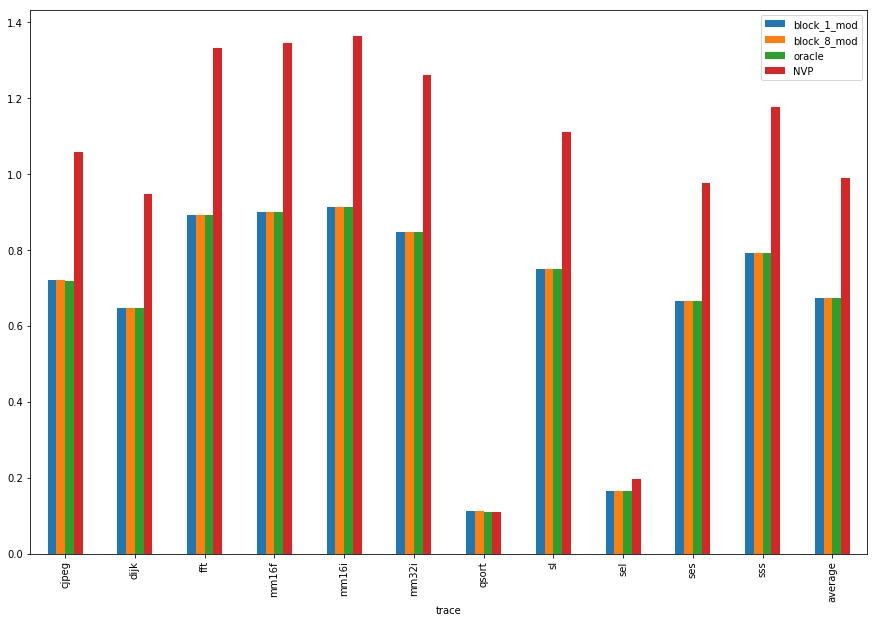

In [31]:
etime_norm = (exec_time_df[['block_1_mod', 'block_8_mod', 'oracle', 'NVP']].T / exec_time_df['hibernus'])
etime_norm['average'] = etime_norm.T.mean()
etime_norm.T.plot(kind='bar', figsize=(15,10))
plt.show()

### Average decrease in execution time

In [32]:
((1-etime_norm) * 100).T.round(2)

block_1_mod  block_8_mod  oracle    NVP
trace                                           
cjpeg          27.93        27.91   28.13  -5.94
dijk           35.21        35.17   35.27   5.14
fft            10.68        10.67   10.70 -33.30
mm16f           9.90         9.88    9.93 -34.50
mm16i           8.72         8.71    8.75 -36.34
mm32i          15.32        15.31   15.35 -26.01
qsort          88.79        88.77   88.90  89.00
sl             24.90        24.89   24.95 -11.05
sel            83.49        83.48   83.50  80.27
ses            33.35        33.31   33.41   2.35
sss            20.75        20.75   20.76 -17.59
average        32.64        32.62   32.69   1.09

## Backup + Restore time

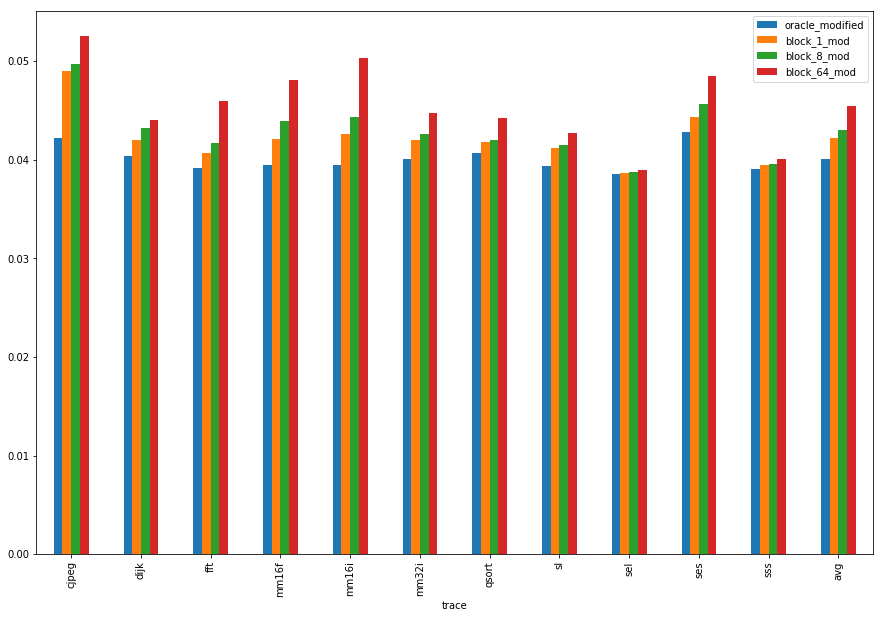

In [33]:
br_time_df = (cmp * t_w_fram + cmp.loc['hibernus_page_512'] * t_w_fram).iloc[:-1].T
br_time_df['hibernus_page_512'] = t_save_h + t_restore_h
cols = ['oracle_modified', 'block_1_mod', 'block_8_mod', 'block_64_mod']
br = br_time_df[cols].T.divide(br_time_df['hibernus_page_512'])
br['avg'] = br.T.mean()
br.T.plot(kind='bar', figsize=(15, 10))
plt.show()

In [34]:
br

trace               cjpeg      dijk       fft     mm16f     mm16i     mm32i  \
oracle_modified  0.042171  0.040380  0.039180  0.039482  0.039424  0.040077   
block_1_mod      0.049053  0.042042  0.040701  0.042160  0.042650  0.042011   
block_8_mod      0.049732  0.043213  0.041746  0.043957  0.044304  0.042653   
block_64_mod     0.052513  0.044089  0.045992  0.048075  0.050291  0.044770   

trace               qsort        sl       sel       ses       sss       avg  
oracle_modified  0.040677  0.039363  0.038583  0.042845  0.039065  0.040113  
block_1_mod      0.041807  0.041194  0.038690  0.044369  0.039435  0.042192  
block_8_mod      0.042044  0.041530  0.038803  0.045699  0.039532  0.043019  
block_64_mod     0.044258  0.042764  0.038958  0.048463  0.040128  0.045482

In [35]:
1-br['avg']

oracle_modified    0.959887
block_1_mod        0.957808
block_8_mod        0.956981
block_64_mod       0.954518
Name: avg, dtype: float64

## Backup time

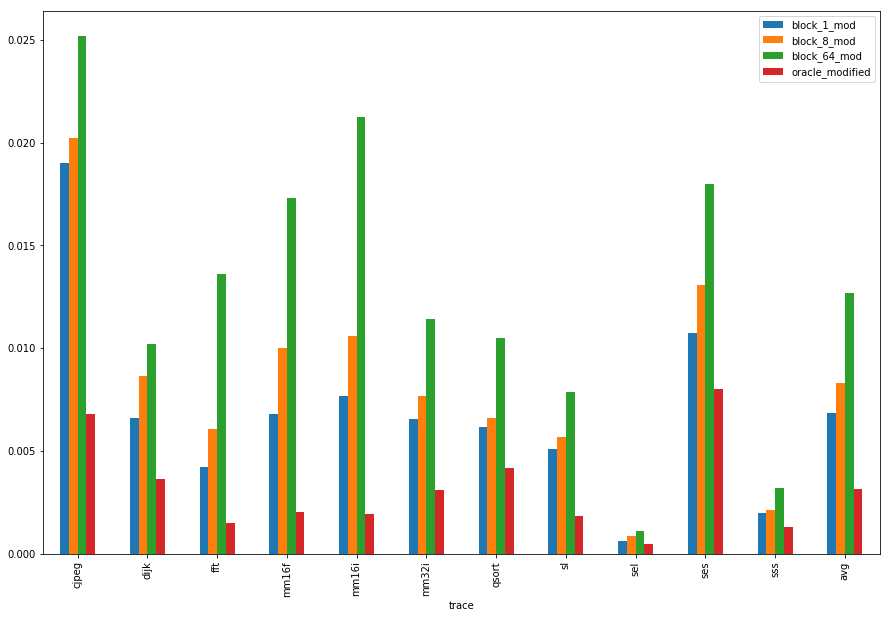

block_1_mod        0.993133
block_8_mod        0.991668
block_64_mod       0.987304
oracle_modified    0.996817
Name: avg, dtype: float64

In [36]:
bt = (cmp.iloc[:-1] * t_w_fram).T[['block_1_mod', 'block_8_mod', 'block_64_mod', 'oracle_modified']]
bt_norm = bt.T.divide(t_save_h).T
bt_norm.loc['avg'] = bt_norm.mean()
bt_norm.plot(kind='bar',figsize=(15,10))
plt.show()
1-bt_norm.loc['avg']

### Backup time Liu (65 nm ReRAM)

In [37]:
backup_time_liu_paper = 1.02e-3 - 4e-6 # for 4KB nvRAM 
backup_size_liu = 1024 # 4KB -> 1K words of 32bit
backup_time_per_word_liu = (backup_time_liu_paper / backup_size_liu)
backup_time_liu = cmp.T.hibernus_page_1K * backup_time_per_word_liu

In [38]:
backup_time_per_word_liu

9.921875e-07

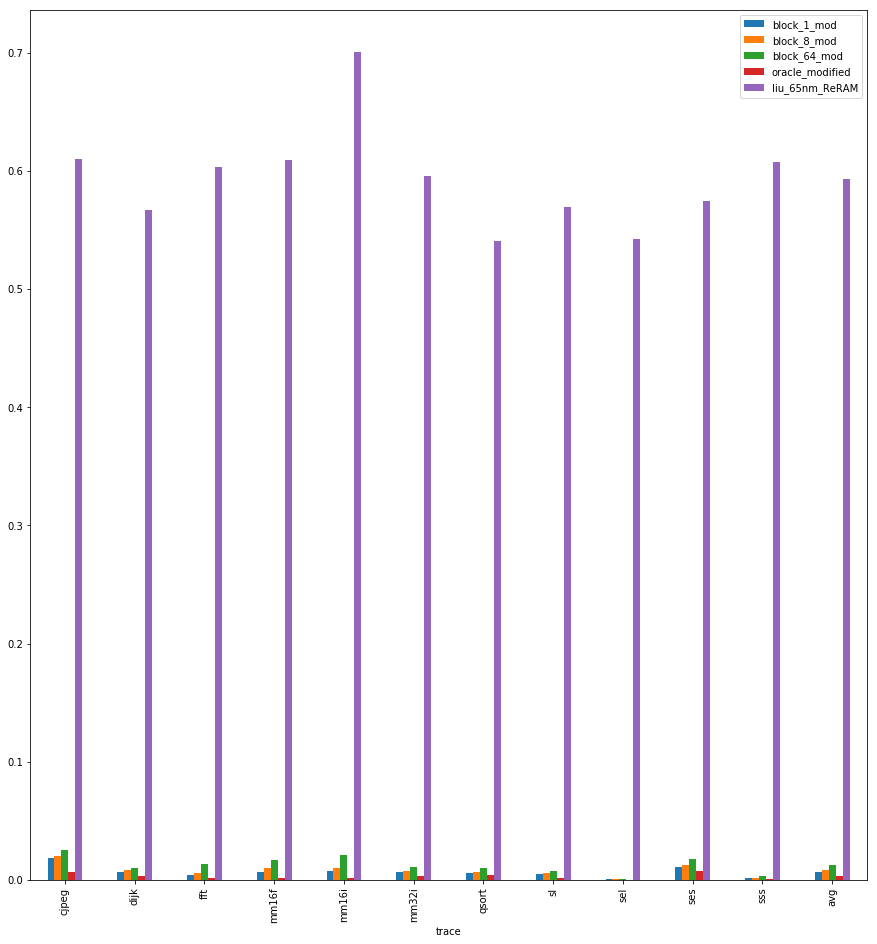

In [39]:
bt_norm['liu_65nm_ReRAM'] = backup_time_liu / t_save_h
bt_norm.loc['avg'] = bt_norm.mean()
bt_norm.plot(kind='bar', figsize=(15,16))
plt.show()

In [40]:
((1-bt_norm.T )* 100).T.round(2)

block_1_mod  block_8_mod  block_64_mod  oracle_modified  liu_65nm_ReRAM
trace                                                                         
cjpeg        98.10        97.98         97.48            99.32           38.97
dijk         99.34        99.13         98.98            99.63           43.32
fft          99.58        99.39         98.64            99.85           39.64
mm16f        99.32        99.00         98.27            99.79           39.08
mm16i        99.23        98.94         97.88            99.80           29.94
mm32i        99.35        99.23         98.86            99.69           40.44
qsort        99.38        99.34         98.95            99.58           45.96
sl           99.49        99.43         99.21            99.81           43.03
sel          99.93        99.91         99.89            99.95           45.78
ses          98.93        98.69         98.20            99.20           42.58
sss          99.80        99.78         99.68            99.87           39.25
avg          99.31        99.17         98.73            99.68           40.73

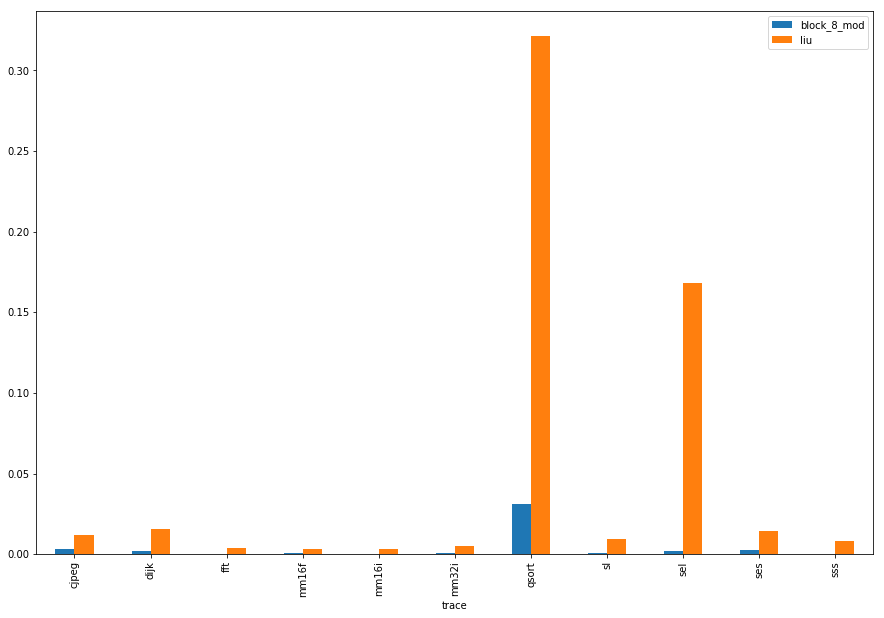

In [41]:
block_8_time_liu = (cmp.T.block_8_mod * backup_time_per_word_liu)
pd.DataFrame({'block_8_mod': block_8_time_liu, 'liu': backup_time_liu}).plot(kind='bar', figsize=(15,10))
plt.show()